In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [85]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.preprocessing

from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding

from sklearn.model_selection import StratifiedKFold

In [70]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1990 - 2014 z rôznych štátov USA
# pre lepsie pracovanie s datami a moznosti uploadovania na github sa velkost datasetu znizila o 10 rokov
dataset = pd.read_csv("dataset-1990-2014.csv")
                                             

In [71]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
dataset.head()

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,198532,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,February,1,...,Unknown,Male,49.0,White,Unknown,Girlfriend,Handgun,0,0,FBI
1,1,198533,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,1,...,Unknown,Male,18.0,White,Unknown,Stranger,Handgun,0,1,FBI
2,2,198534,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,2,...,Unknown,Male,28.0,Native American/Alaska Native,Unknown,Girlfriend,Blunt Object,0,0,FBI
3,3,198535,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,June,1,...,Unknown,Male,21.0,Native American/Alaska Native,Unknown,Stranger,Blunt Object,0,0,FBI
4,4,198536,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,August,1,...,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun,0,0,FBI


### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [72]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
dataset.shape

(433265, 25)

In [73]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný, tj neosasuje nenulove hodnoty 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433265 entries, 0 to 433264
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             433265 non-null  int64  
 1   Record ID              433265 non-null  int64  
 2   Agency Code            433265 non-null  object 
 3   Agency Name            433265 non-null  object 
 4   Agency Type            433265 non-null  object 
 5   City                   433265 non-null  object 
 6   State                  433265 non-null  object 
 7   Year                   433265 non-null  int64  
 8   Month                  433265 non-null  object 
 9   Incident               433265 non-null  int64  
 10  Crime Type             433265 non-null  object 
 11  Crime Solved           433265 non-null  object 
 12  Victim Sex             433265 non-null  object 
 13  Victim Age             433265 non-null  int64  
 14  Victim Race            433265 non-nu

In [74]:
# skontrolujte, či existujú nulové hodnoty
dataset.isna().sum()

Unnamed: 0               0
Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [75]:
# vidíme, že máme unifirmný počet záznamov,
# koľko jedinečných zázanmov existuje pre každú kategóriu
# najčastejší výskyt
# a frequencia výskytu
dataset.describe()

,Unnamed: 0,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,433265.000000,433265.00000,433265.000000,433265.000000,433265.000000,433264.000000,433265.000000,433265.000000
mean,216632.000000,418720.80751,2000.975853,27.712940,32.167946,19.647300,0.130006,0.206098
std,125072.976528,127126.95709,7.325121,110.074993,15.912915,17.862548,0.547847,0.629041
min,0.000000,198532.00000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108316.000000,308558.00000,1994.000000,1.000000,21.000000,0.000000,0.000000,0.000000
50%,216632.000000,418802.00000,2001.000000,2.000000,29.000000,20.000000,0.000000,0.000000
75%,324948.000000,528991.00000,2007.000000,10.000000,41.000000,31.000000,0.000000,0.000000
max,433264.000000,638454.00000,2014.000000,999.000000,98.000000,99.000000,10.000000,10.000000


## 2. Pochopenie a Vizualizácia dát

<AxesSubplot:xlabel='Month', ylabel='count'>

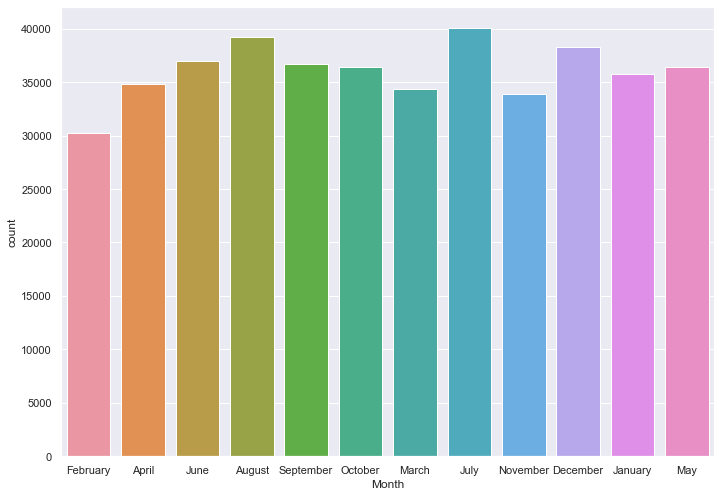

In [86]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Month', data = dataset, ax=ax)


<AxesSubplot:xlabel='Year', ylabel='count'>

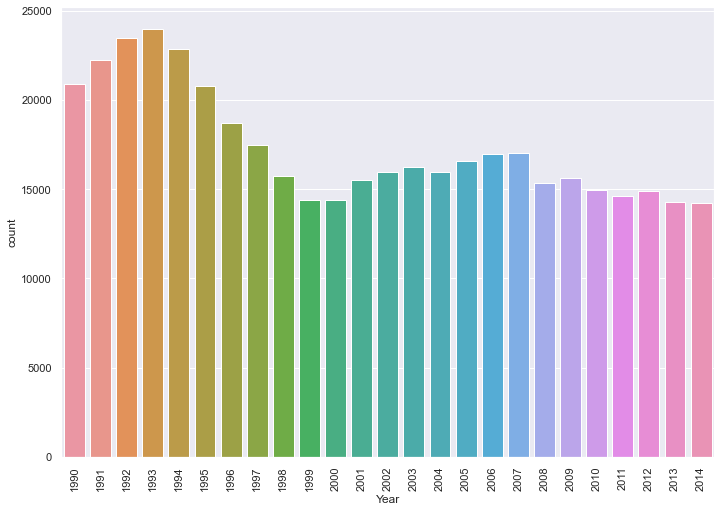

In [131]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Year', data = dataset, ax=ax)

<AxesSubplot:xlabel='City', ylabel='count'>

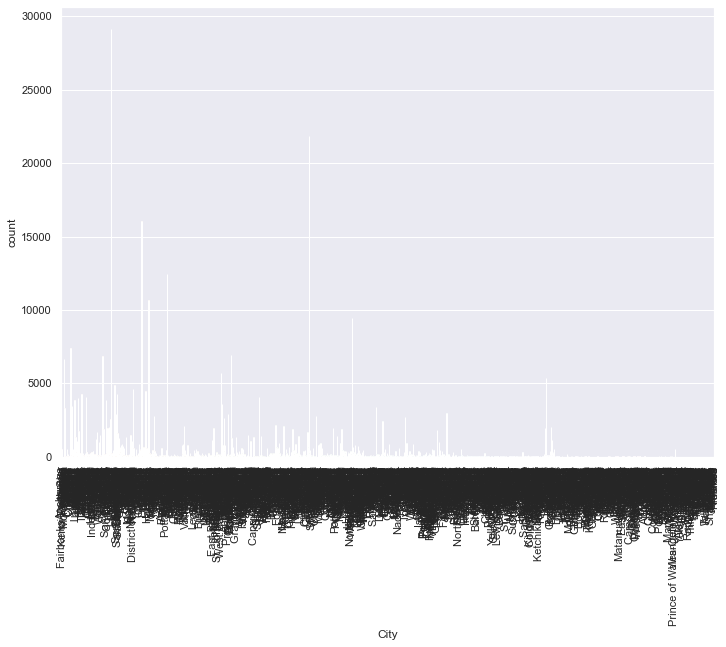

In [130]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'City', data = dataset, ax=ax)

<AxesSubplot:xlabel='State', ylabel='count'>

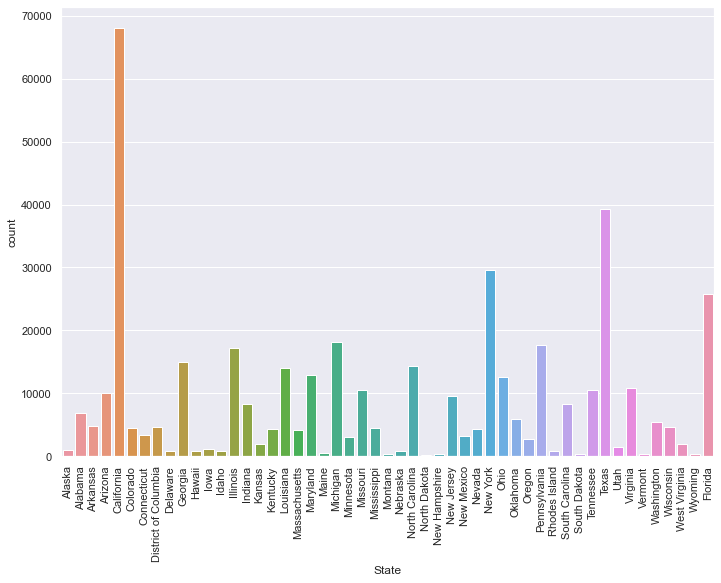

In [129]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'State', data = dataset, ax=ax)

<AxesSubplot:xlabel='State', ylabel='Incident'>

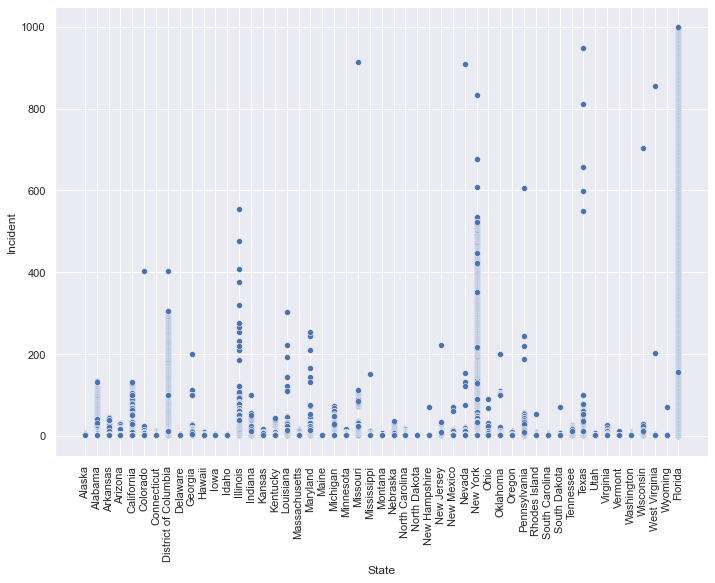

In [132]:
# reduced = dataset[(dataset['State'] > ].shape[0]
fig, ax= plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.scatterplot(data = dataset, x='State', y='Incident')

In [138]:
def search(regex: str, df, case=False):
    """Search all the text columns of `df`, return rows with any matches."""
    textlikes = df.select_dtypes(include=[object, "string"])
    return df[
        textlikes.apply(
            lambda column: column.str.contains(regex, regex=True, case=case, na=False)
        ).any(axis=1)
    ]


In [140]:
search('Missouri', dataset)

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,State Count
10327,10327,209012,MO00400,Audrain,Sheriff,Audrain,Missouri,1990,December,1,...,Male,49.0,White,Unknown,Neighbor,Rifle,1,0,FBI,NaN
10328,10328,209013,MO00400,Audrain,Sheriff,Audrain,Missouri,1990,December,1,...,Male,49.0,White,Unknown,Neighbor,Rifle,1,0,FBI,NaN
10329,10329,209014,MO00404,Mexico,Municipal Police,Audrain,Missouri,1990,November,1,...,Male,25.0,Black,Unknown,Acquaintance,Unknown,0,0,FBI,NaN
10330,10330,209015,MO01000,Boone,Sheriff,Boone,Missouri,1990,March,1,...,Male,33.0,Native American/Alaska Native,Unknown,Stranger,Rifle,0,0,FBI,NaN
10331,10331,209016,MO01002,Columbia,Municipal Police,Boone,Missouri,1990,April,1,...,Male,26.0,White,Unknown,Unknown,Blunt Object,0,0,FBI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,426809,631946,MOSPD00,St. Louis,Municipal Police,St. Louis city,Missouri,2014,December,20,...,Unknown,0.0,Unknown,Unknown,Unknown,Rifle,0,0,FBI,NaN
426810,426810,631947,MOSPD00,St. Louis,Municipal Police,St. Louis city,Missouri,2014,December,21,...,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,NaN
426811,426811,631948,MOSPD00,St. Louis,Municipal Police,St. Louis city,Missouri,2014,December,22,...,Male,21.0,Black,Unknown,Girlfriend,Handgun,0,0,FBI,NaN
426812,426812,631949,MOSPD00,St. Louis,Municipal Police,St. Louis city,Missouri,2014,December,23,...,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI,NaN


In [ ]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==99:
        temp_to_delete.append(x-1)
    

<AxesSubplot:xlabel='Agency Type', ylabel='count'>

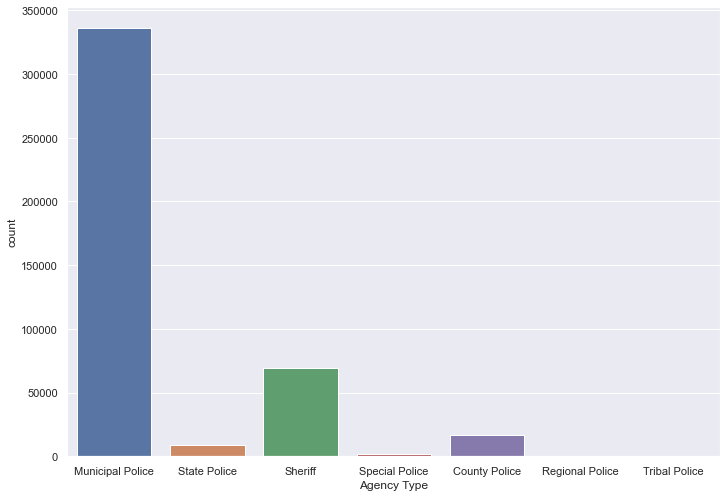

In [93]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Agency Type', data = dataset, ax=ax)

<AxesSubplot:xlabel='Incident', ylabel='count'>

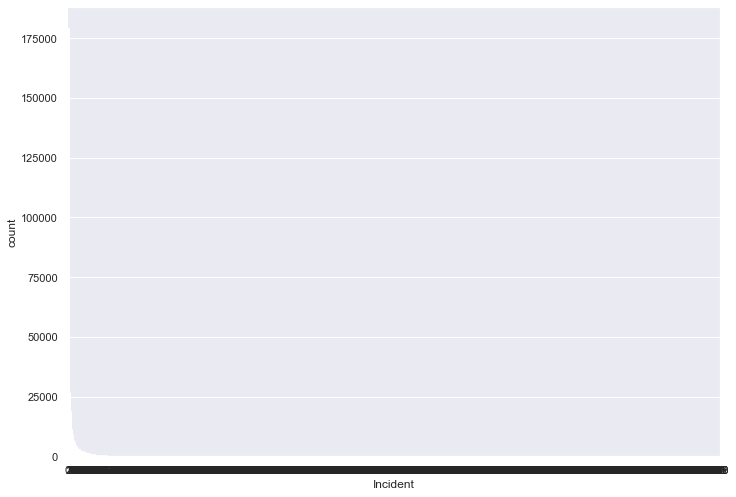

In [96]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Incident', data = dataset, ax=ax)

<AxesSubplot:xlabel='Crime Type', ylabel='count'>

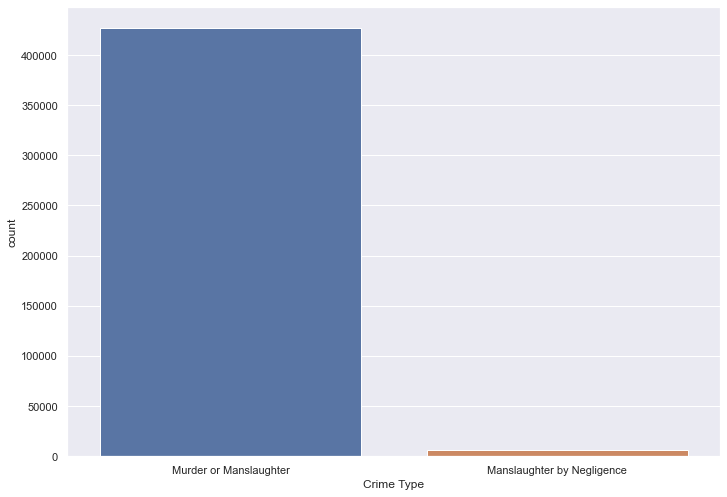

In [97]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Crime Type', data = dataset, ax=ax)

<AxesSubplot:xlabel='Crime Solved', ylabel='count'>

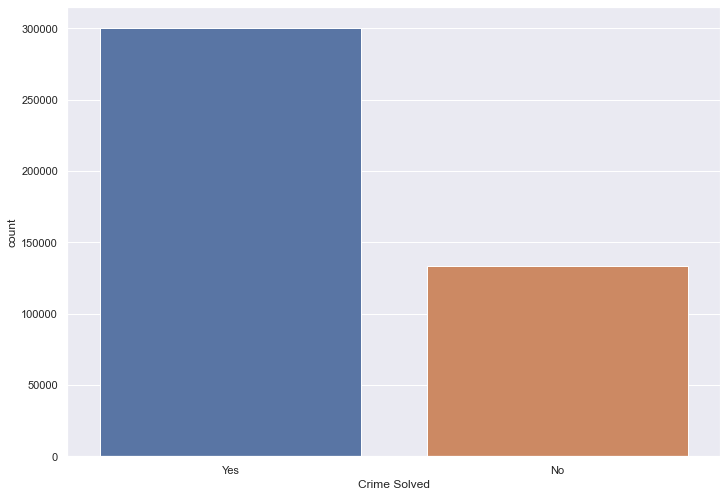

In [98]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Crime Solved', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Sex', ylabel='count'>

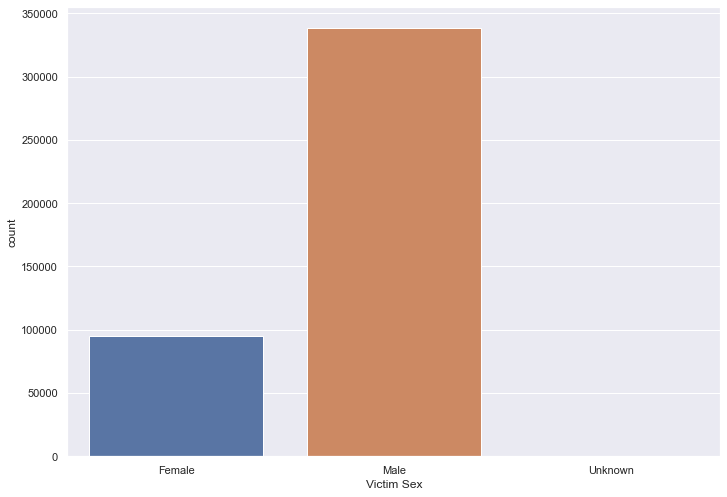

In [99]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Sex', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

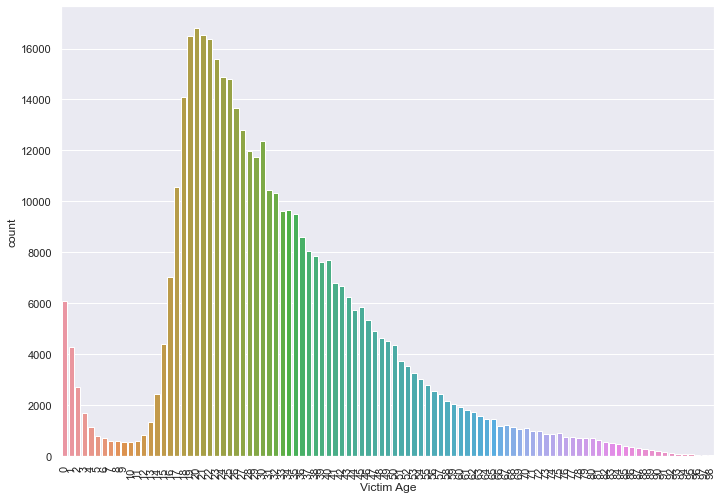

In [133]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Victim Age', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Race', ylabel='count'>

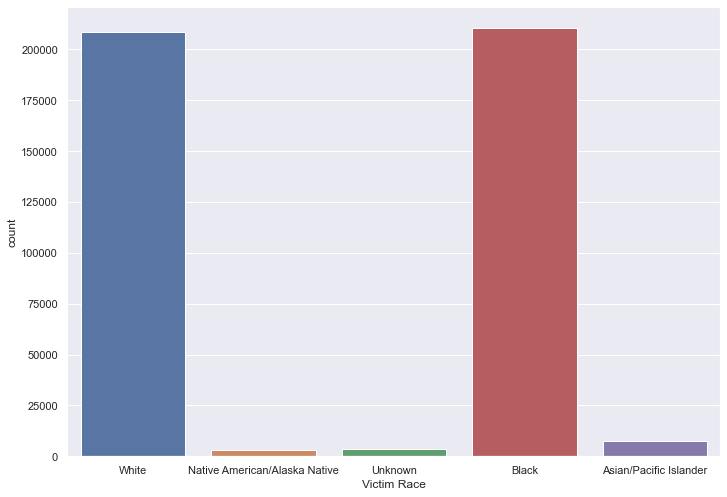

In [101]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Race', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Ethnicity', ylabel='count'>

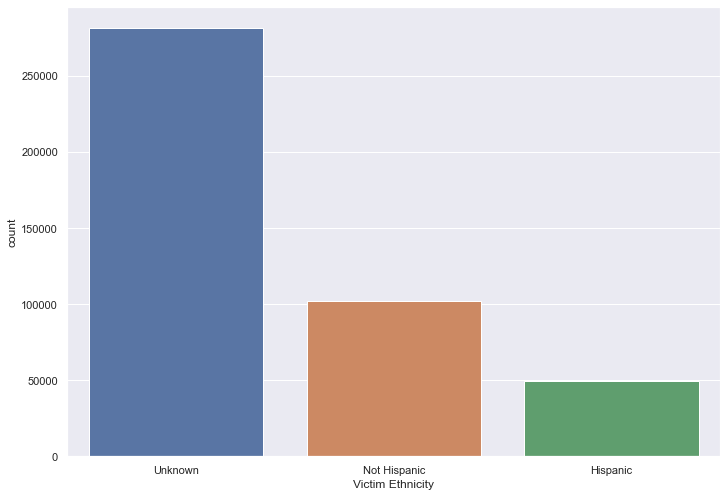

In [102]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Ethnicity', data = dataset, ax=ax)

<AxesSubplot:xlabel='Perpetrator Sex', ylabel='count'>

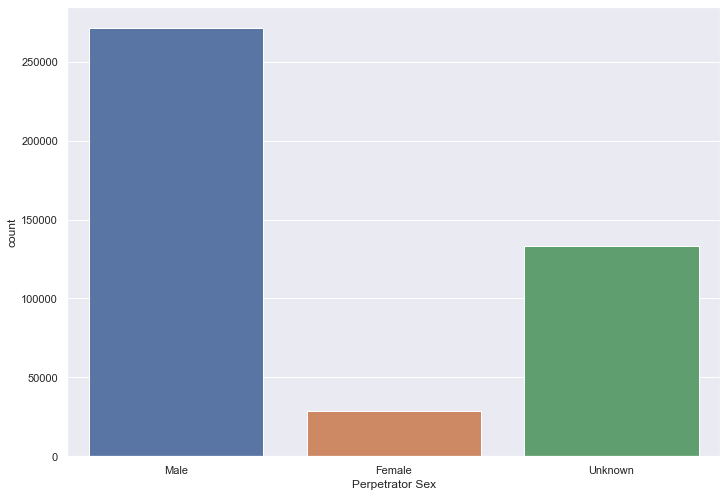

In [103]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Sex', data = dataset, ax=ax)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

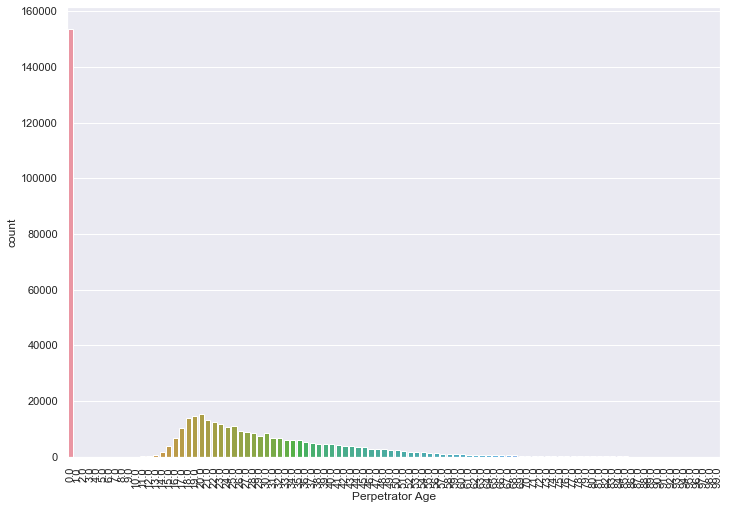

In [134]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Perpetrator Age', data = dataset, ax=ax)

<AxesSubplot:xlabel='Perpetrator Race', ylabel='count'>

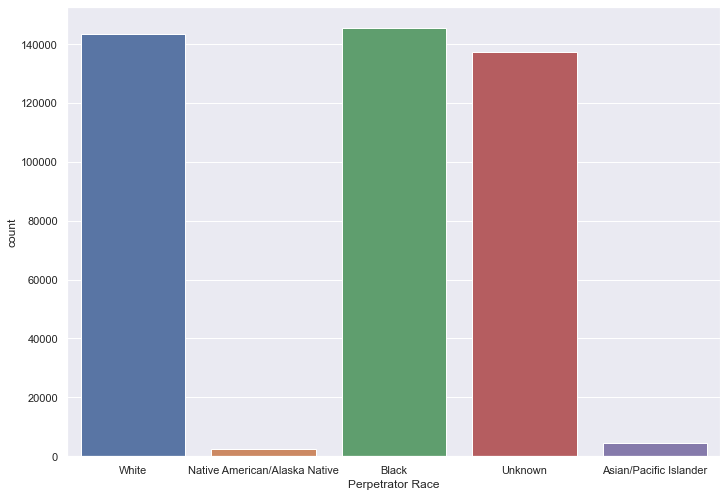

In [105]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Race', data = dataset, ax=ax)

<AxesSubplot:xlabel='Perpetrator Ethnicity', ylabel='count'>

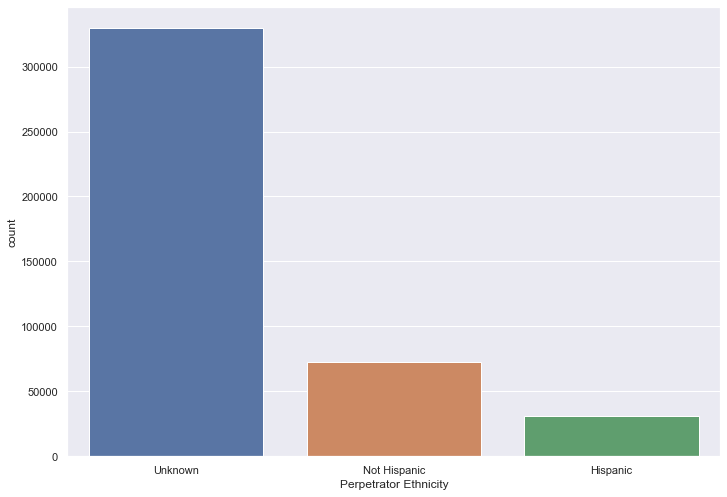

In [106]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Ethnicity', data = dataset, ax=ax)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

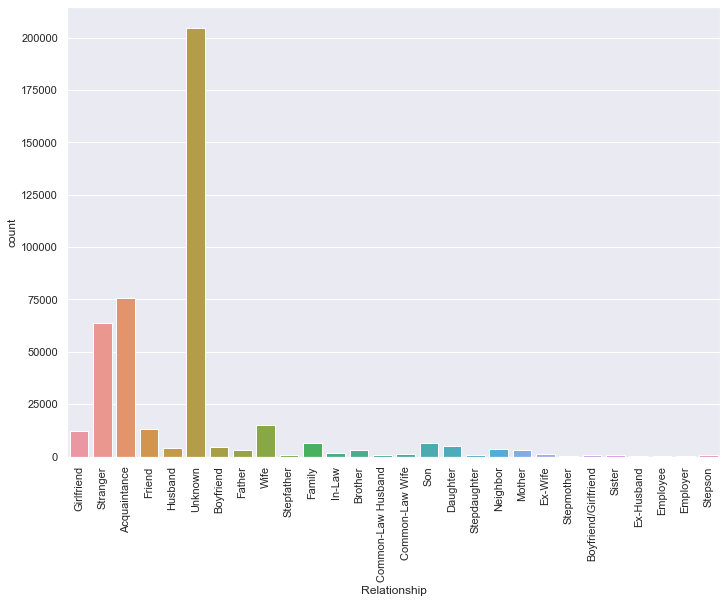

In [135]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Relationship', data = dataset, ax=ax)

<AxesSubplot:xlabel='Weapon', ylabel='count'>

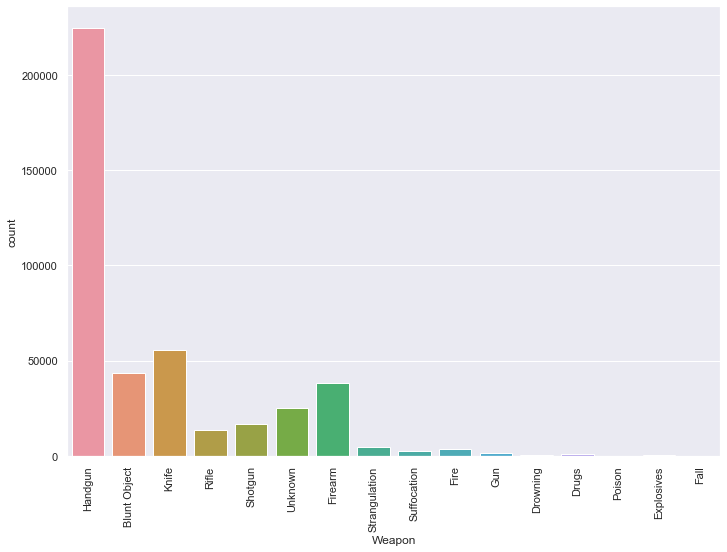

In [136]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation= 'vertical')
sns.countplot(x = 'Weapon', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Count', ylabel='count'>

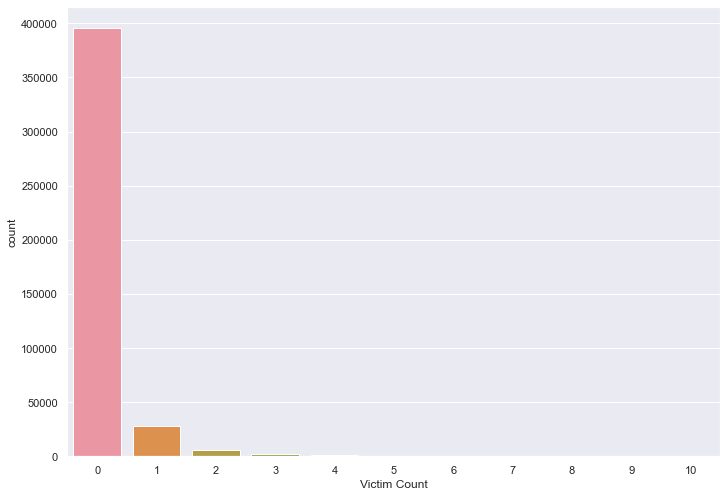

In [109]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Victim Count', data = dataset, ax=ax)

<AxesSubplot:xlabel='Perpetrator Count', ylabel='count'>

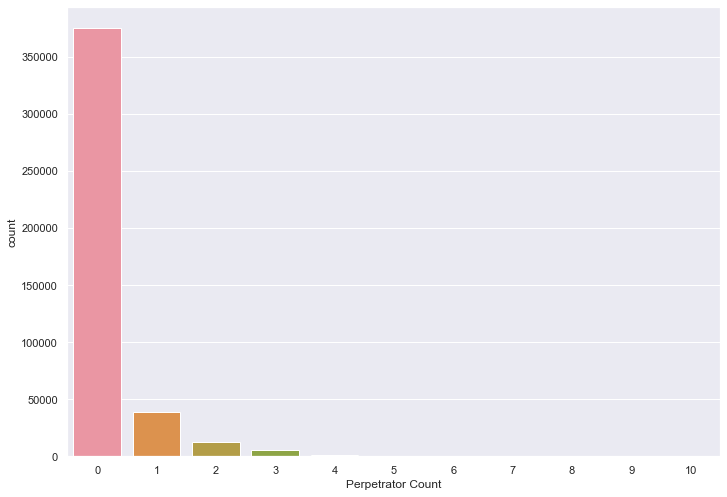

In [110]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'Perpetrator Count', data = dataset, ax=ax)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

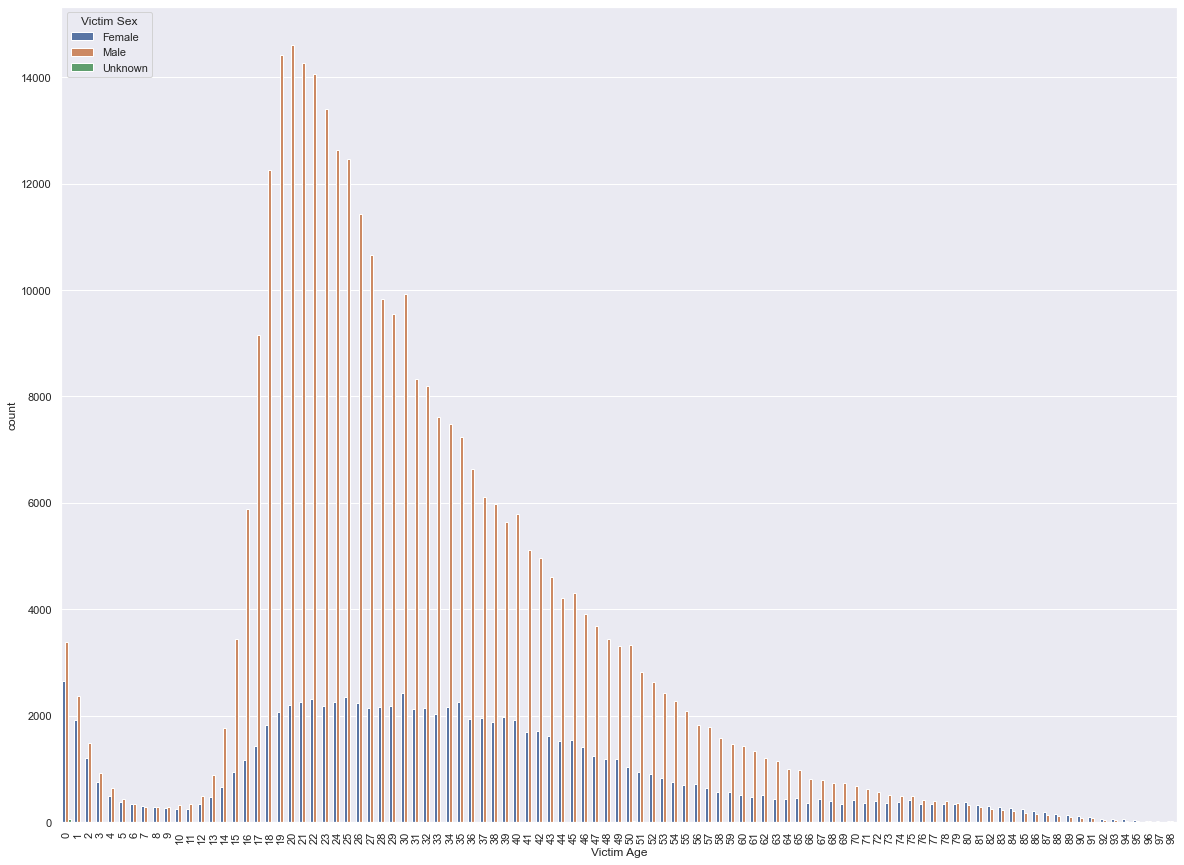

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
plt.xticks(rotation= 'vertical')
sns.countplot(x='Victim Age', hue='Victim Sex',data = dataset)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

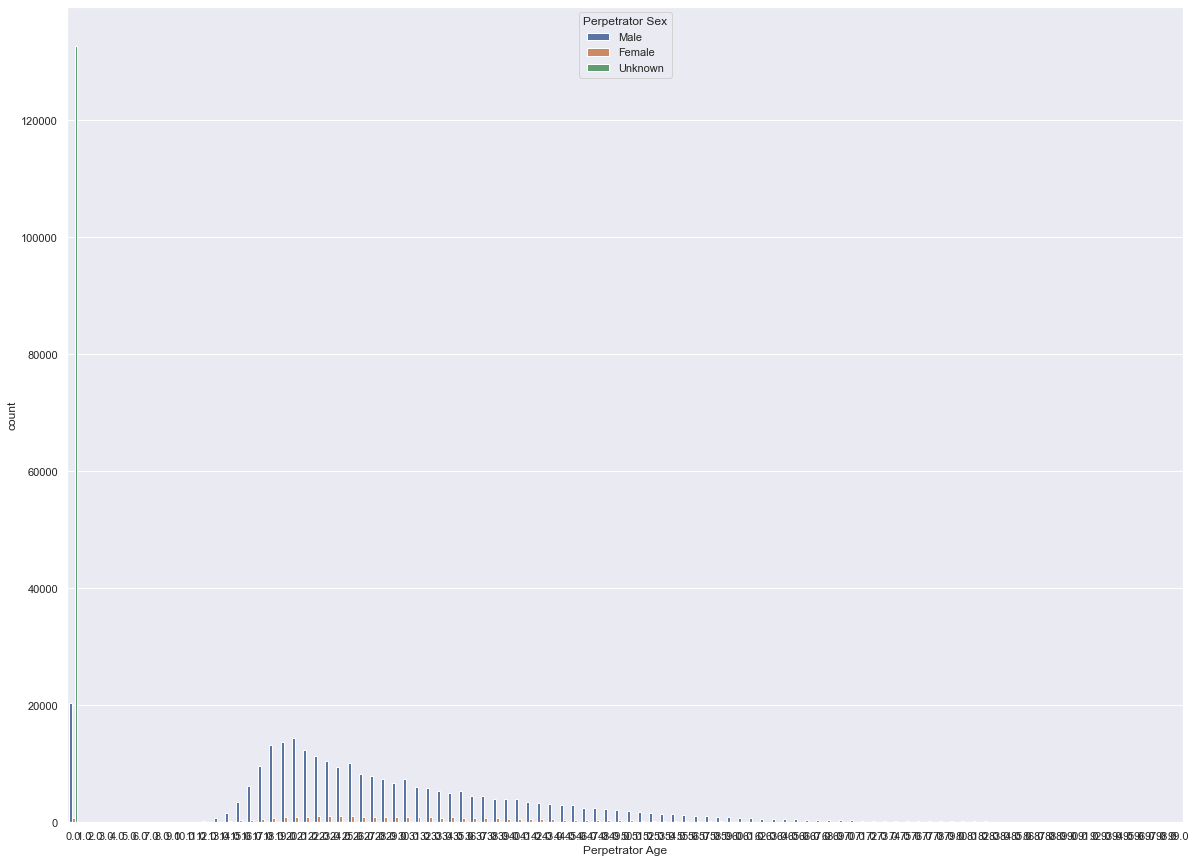

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = dataset)

## 3. Konštrukcia modelu
<ul>
    <li> Špecifikácia vstupného tvaru </li>
    <li> </li>
    <li> </li>
    <li> </li>
</ul>

## 4. Kompilácia modelu
Pred trénovaním modelu je potreba konfigurovat učiaci sa proces, pomocou kompilačnej metódy. K tomu budeme potrebovať.
<ul>
    <li> Optimizér: </li>
    <li> Loss function: </li>
    <li> Zoznam metrík: V prípade kategorického modelu ako nášho je accuracy (presnosť) </li>
    <li> </li>
</ul>

In [ ]:
model.compile()

## 5. Trenovanie modelu

## 6. Evaluacia modelu

## 7. Test predikcie